# apply TOPUP

1. Problem with fMRI BOLD Data:
* Functional MRI (fMRI) BOLD data is often susceptible to distortions caused by magnetic field inhomogeneity. These distortions can significantly degrade the quality of the acquired data.

2. Fieldmaps and B0 Field:
* Typically, fieldmaps are used to measure the B0 field within the scanner, helping to identify areas of inhomogeneity.
* Fieldmaps are acquired with different encoding directions to help correct for these distortions.

3. Typical Setup:
* In most cases, researchers collect BOLD data with a single encoding direction (e.g., Anterior to Posterior (A >> P)), paired with a fieldmap that includes two encoding directions (A >> P and Posterior to Anterior (P >> A)). 
* This approach allows for effective correction of field inhomogeneities.

4. Current Protocol:
* In our current protocol, we follow a similar scheme but only collect a fieldmap with a single encoding direction (opposite of the BOLD's encoding direction).

5. Creating a Synthetic Fieldmap:
* To address this limitation, I created a synthetic fieldmap by selecting a few slices from the acquired BOLD data. These slices are then merged with the phase-encoded data (PEPOLAR map) from our sequence to form the synthetic fieldmap.

6. TOPUP Application:
* TOPUP is then applied using this synthetic fieldmap to correct for the distortions. The results of this correction will be assessed to check whether the distortions have been effectively resolved.

Source image shape: (88, 88, 50)
Affine (source):
 [[  -2.5           0.           -0.          113.4375    ]
 [  -0.            2.48646164   -0.25982639 -109.99823761]
 [   0.            0.25982621    2.48646355  -52.88428116]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (88, 88, 50)
Affine (corrected):
 [[  -2.5           0.            0.          113.4375    ]
 [   0.            2.48646164   -0.25982639 -109.99823761]
 [   0.            0.25982621    2.48646355  -52.88428116]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(
/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(
/var/folders/yc/y436cq1j2733vcg9y4l4nrrm0000gp/T/ipykernel_85439/2579322383.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


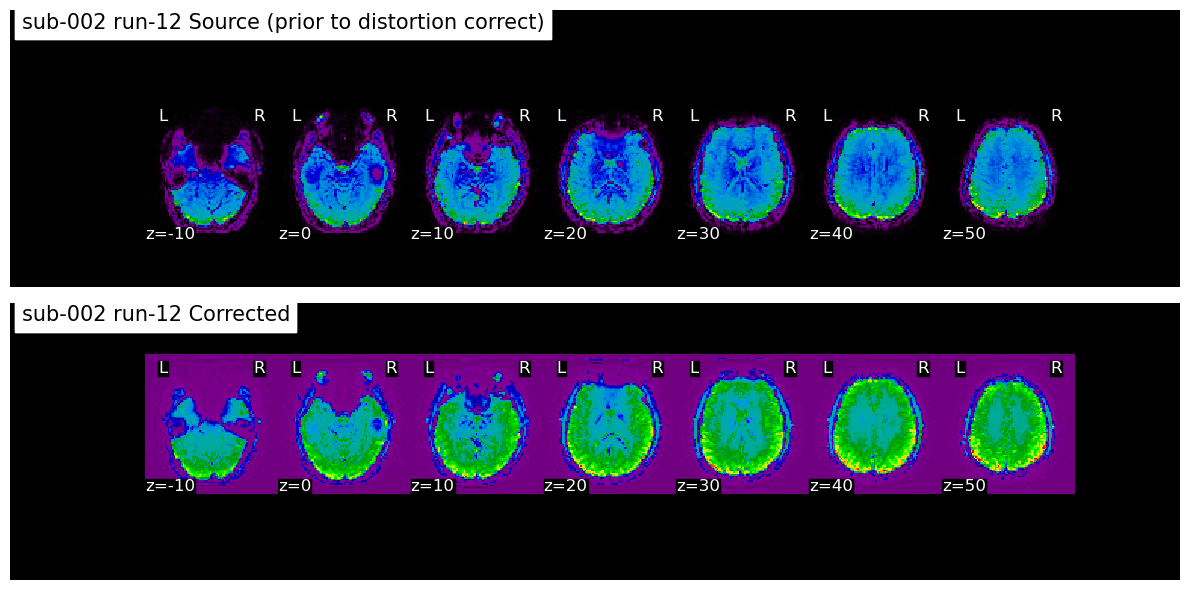

IndexError: list index out of range

In [ ]:
import matplotlib.pyplot as plt
from nilearn import plotting, image
import glob
ses = 'ses-03'
for run in ['run-12', 'run-13']:
    # Path to the EPI image files
    source_fname = glob.glob(f"/Users/heejungj/Documents/projects_local/visualsnow_source/sub-002/{ses}/func/sub-002_{ses}_task-*_{run}_bold.nii.gz")[0]
    # epi_image_path = glob.glob(f"/Users/heejungj/Documents/projects_local/visualsnow_source/TST/sub-002/sub-002_task-*_{run}_boldcorrected.nii.gz")[0]
    epi_image_path = glob.glob(f"/Users/heejungj/Documents/projects_local/SDC/sub-002/ses-03/sub-002_{ses}_task-rest*_{run}_boldcorrected.nii.gz")[0]
    

    # Load the EPI images
    source_img = image.load_img(source_fname)
    epi_img = image.load_img(epi_image_path)

    # Extract the third volume (index 2)
    third_source = image.index_img(source_img, 2)
    third_volume = image.index_img(epi_img, 2)

    # Print image shapes for debugging
    print("Source image shape:", third_source.shape)
    print("Affine (source):\n", third_source.affine)
    print("Corrected image shape:", third_volume.shape)
    print("Affine (corrected):\n", third_volume.affine)

    # Create a subplot with 1 row and 2 columns (side by side)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

    # Plot the pre-correction image (source) on the first axis

    plotting.plot_anat(
        third_source,
        display_mode="z",
        title=f"sub-002 {run} Source (prior to distortion correct)",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax1,
        draw_cross=True
    )

    # Plot the post-correction image (corrected) on the second axis
    plotting.plot_anat(
        third_volume,
        display_mode="z",
        title=f"sub-002 {run} Corrected",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax2,
        draw_cross=True
    )
    plotting.plot_epi(
        third_source,
        display_mode="z",
        title=f"sub-002 {run} Source (prior to distortion correct)",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax1,
        draw_cross=True
    )

    # Plot the post-correction image (corrected) on the second axis
    plotting.plot_epi(
        third_volume,
        display_mode="z",
        title=f"sub-002 {run} Corrected",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax2,
        draw_cross=True
    )
    plt.tight_layout()
    # Show the plot
    plt.show()


Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(
/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(
/var/folders/yc/y436cq1j2733vcg9y4l4nrrm0000gp/T/ipykernel_22897/598536579.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


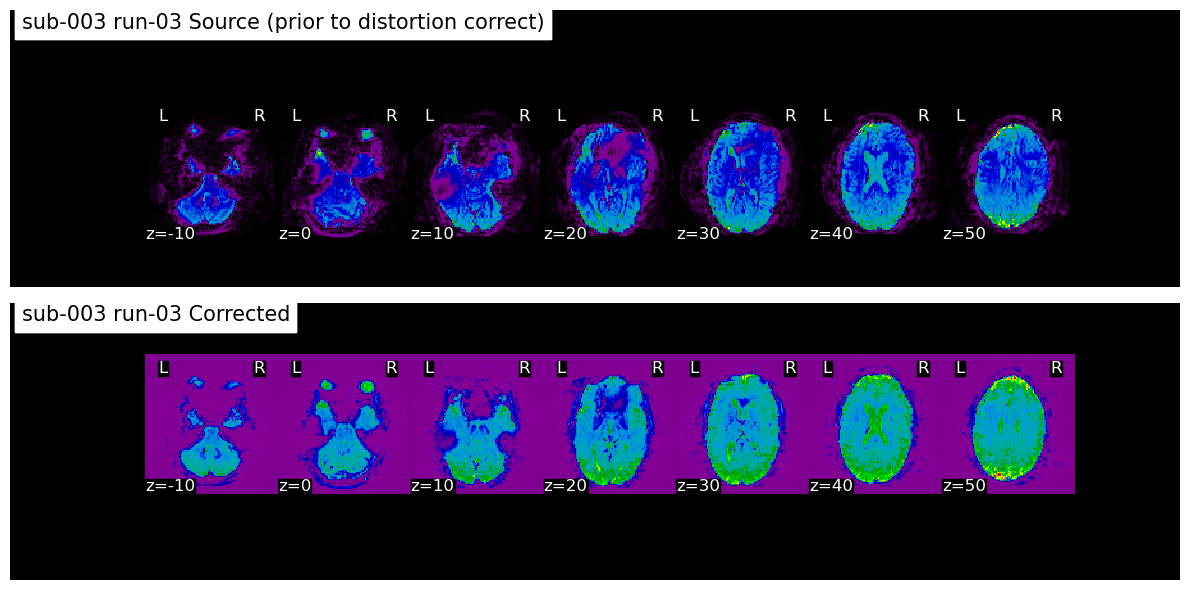

Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(
/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(
/var/folders/yc/y436cq1j2733vcg9y4l4nrrm0000gp/T/ipykernel_22897/598536579.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


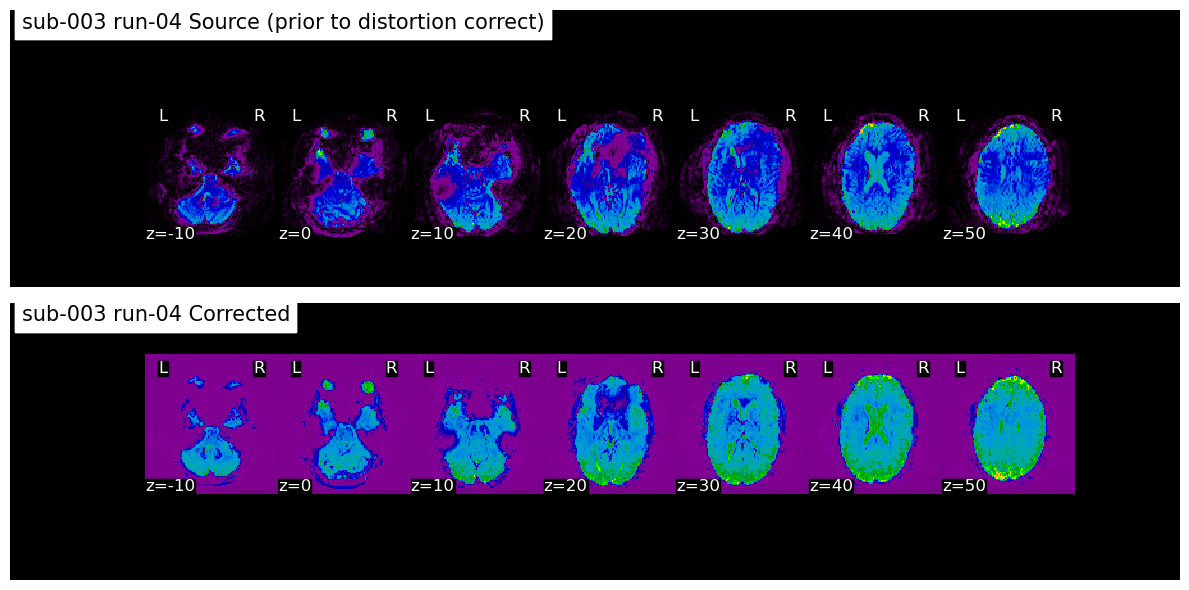

In [8]:
import matplotlib.pyplot as plt
from nilearn import plotting, image
import glob
sub = 'sub-003'
for run in ['run-03', 'run-04']:
    # Path to the EPI image files
    source_fname = glob.glob(f"/Users/heejungj/Documents/projects_local/visualsnow_source/{sub}/func/{sub}_task-*_{run}_bold.nii.gz")[0]
    epi_image_path = glob.glob(f"/Users/heejungj/Documents/projects_local/visualsnow_source/TST/{sub}/{sub}_task-*_{run}_boldcorrected.nii.gz")[0]

    # Load the EPI images
    source_img = image.load_img(source_fname)
    epi_img = image.load_img(epi_image_path)

    # Extract the third volume (index 2)
    third_source = image.index_img(source_img, 2)
    third_volume = image.index_img(epi_img, 2)

    # Print image shapes for debugging
    print("Source image shape:", third_source.shape)
    print("Affine (source):\n", third_source.affine)
    print("Corrected image shape:", third_volume.shape)
    print("Affine (corrected):\n", third_volume.affine)

    # Create a subplot with 1 row and 2 columns (side by side)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

    # Plot the pre-correction image (source) on the first axis

    plotting.plot_anat(
        third_source,
        display_mode="z",
        title=f"{sub} {run} Source (prior to distortion correct)",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax1,
        draw_cross=True
    )

    # Plot the post-correction image (corrected) on the second axis
    plotting.plot_anat(
        third_volume,
        display_mode="z",
        title=f"{sub} {run} Corrected",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax2,
        draw_cross=True
    )
    plotting.plot_epi(
        third_source,
        display_mode="z",
        title=f"{sub} {run} Source (prior to distortion correct)",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax1,
        draw_cross=True
    )

    # Plot the post-correction image (corrected) on the second axis
    plotting.plot_epi(
        third_volume,
        display_mode="z",
        title=f"{sub} {run} Corrected",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax2,
        draw_cross=True
    )
    plt.tight_layout()
    # Show the plot
    plt.show()


# participants with mismatch fieldmaps 
* The solution is to grab a fieldmap that has a bipolar encoding direction
* sub-002 run-01 has an encoding of A >> P (j-), but the fieldmap was collected as L >> R (i-)
* Luckily, there was a P >> A (j) fieldmap collected during run-08
* All in all, we use pepolar map run-08 and apply it to bold run-01



sub-002 run-01 run-08
Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


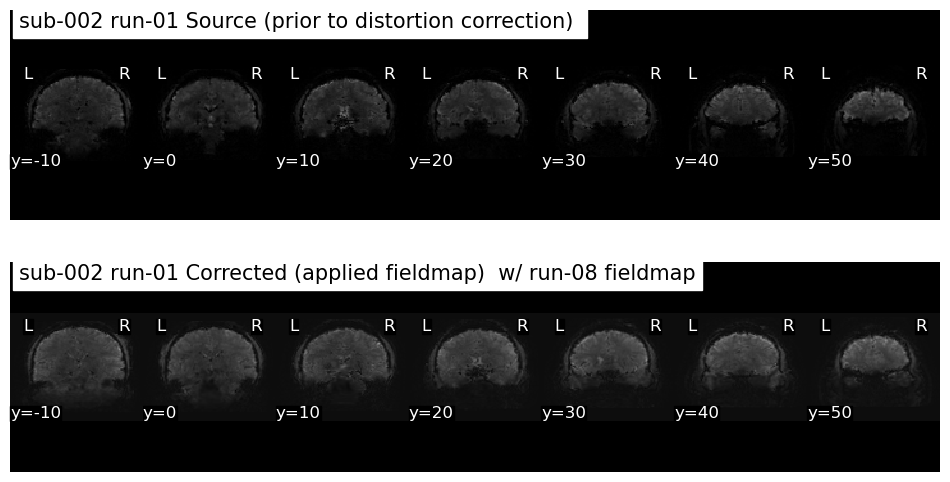

sub-002 run-02 run-08
Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


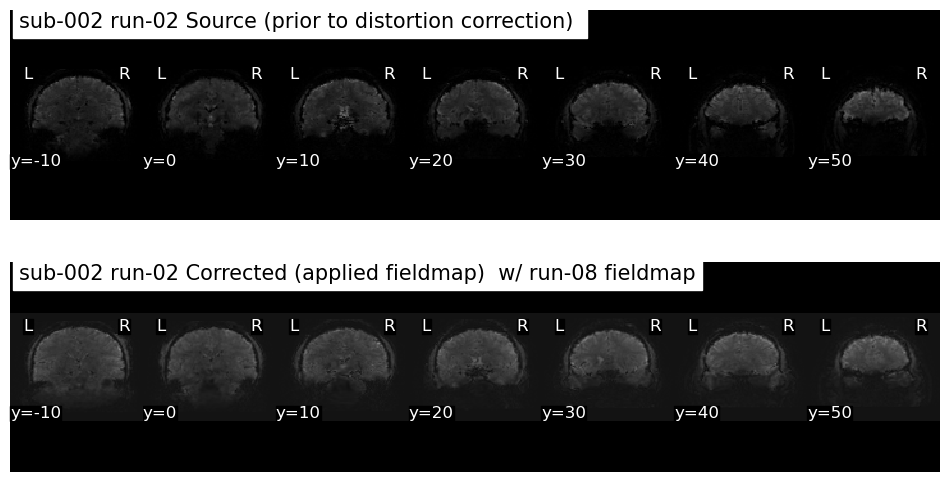

sub-002 run-08 run-07
Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


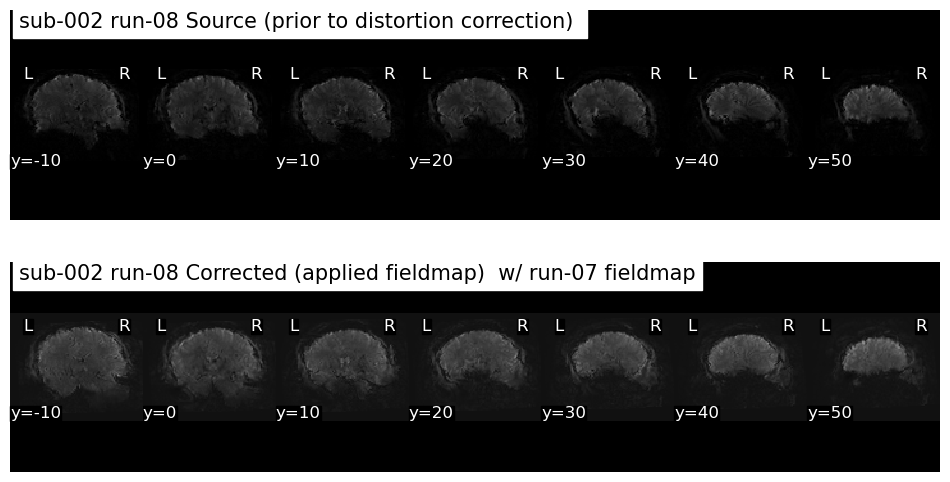

sub-003 run-01 run-06
Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


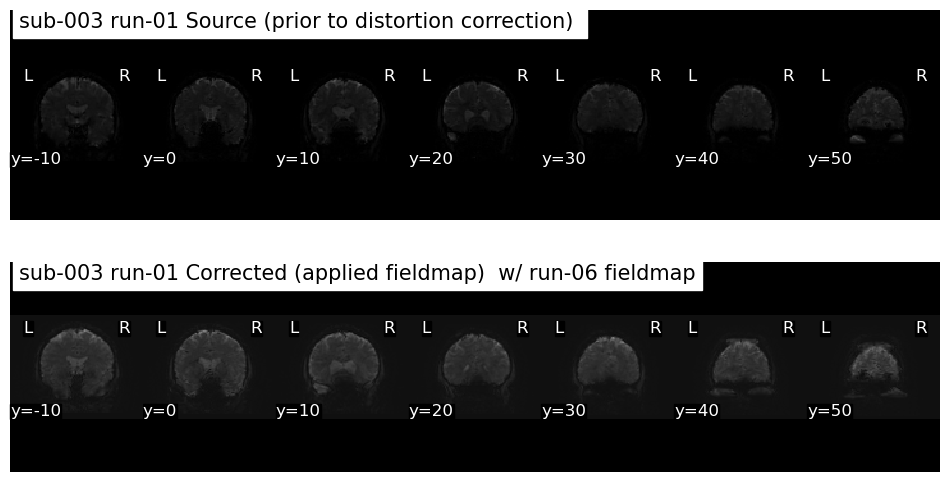

sub-003 run-06 run-07
Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


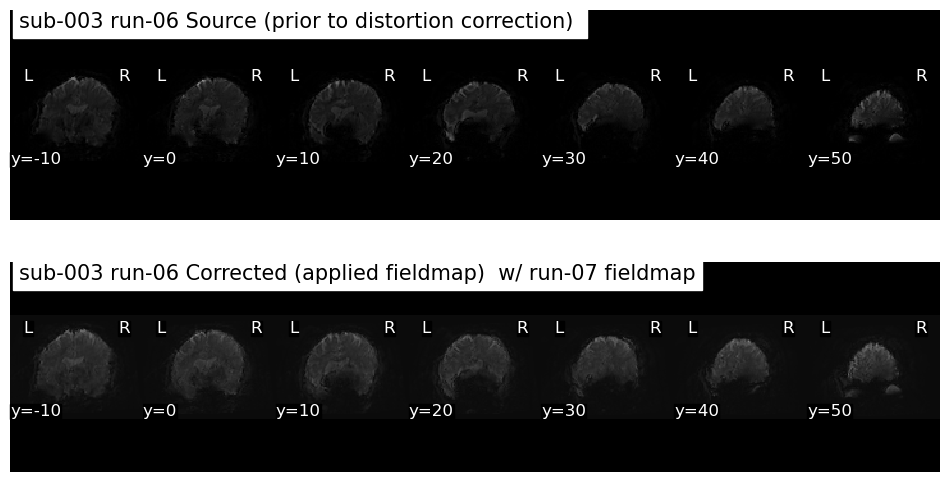

In [2]:
import matplotlib.pyplot as plt
from nilearn import plotting, image
import glob
remedy_list = [
    ('sub-002', 'run-01', 'run-08'),
    ('sub-002', 'run-02', 'run-08'),
    ('sub-002', 'run-08', 'run-07'),
    ('sub-003', 'run-01', 'run-06'),
    ('sub-003', 'run-06', 'run-07')]

source_dir = '/Users/heejungj/Documents/projects_local/visualsnow_source'
for i, (sub, epi_run, fieldmap_run) in enumerate(remedy_list):
    print(sub, epi_run, fieldmap_run)
    # Path to the EPI image files
    source_fname = glob.glob(f"{source_dir}/{sub}/func/{sub}_task-*_{epi_run}_bold.nii.gz")[0]
    epi_image_path = glob.glob(f"{source_dir}/TST/{sub}/{sub}_task-*_{epi_run}_boldcorrected.nii.gz")[0]

    # Load the EPI images
    source_img = image.load_img(source_fname)
    epi_img = image.load_img(epi_image_path)

    # Extract the third volume (index 2)
    third_source = image.index_img(source_img, 2)
    third_volume = image.index_img(epi_img, 2)

    # Print image shapes for debugging
    print("Source image shape:", third_source.shape)
    print("Affine (source):\n", third_source.affine)
    print("Corrected image shape:", third_volume.shape)
    print("Affine (corrected):\n", third_volume.affine)

    # Create a subplot with 1 row and 2 columns (side by side)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

    # Plot the pre-correction image (source) on the first axis
    plotting.plot_anat(
        third_source,
        display_mode="y",
        title=f"{sub} {epi_run} Source (prior to distortion correction) ",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax1, 
        draw_cross=True
    )

    # Plot the post-correction image (corrected) on the second axis
    plotting.plot_anat(
        third_volume,
        display_mode="y",
        title=f"{sub} {epi_run} Corrected (applied fieldmap)  w/ {fieldmap_run} fieldmap",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax2, 
        draw_cross=True
    )
    
    # Show the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from nilearn import plotting, image
import glob
remedy_list = [
    ('sub-002', 'run-01', 'run-08'),
    ('sub-002', 'run-02', 'run-08'),
    ('sub-002', 'run-08', 'run-07'),
    ('sub-003', 'run-01', 'run-06'),
    ('sub-003', 'run-06', 'run-07')]

source_dir = '/Users/heejungj/Documents/projects_local/visualsnow_source'
for i, (sub, epi_run, fieldmap_run) in enumerate(remedy_list):
    print(sub, epi_run, fieldmap_run)
    # Path to the EPI image files
    source_fname = glob.glob(f"{source_dir}/{sub}/func/{sub}_task-*_{epi_run}_bold.nii.gz")[0]
    epi_image_path = glob.glob(f"{source_dir}/TST/{sub}/{sub}_task-*_{epi_run}_boldcorrected.nii.gz")[0]

    # Load the EPI images
    source_img = image.load_img(source_fname)
    epi_img = image.load_img(epi_image_path)

    # Extract the third volume (index 2)
    third_source = image.index_img(source_img, 2)
    third_volume = image.index_img(epi_img, 2)

    # Print image shapes for debugging
    print("Source image shape:", third_source.shape)
    print("Affine (source):\n", third_source.affine)
    print("Corrected image shape:", third_volume.shape)
    print("Affine (corrected):\n", third_volume.affine)

    # Create a subplot with 1 row and 2 columns (side by side)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

    # Plot the pre-correction image (source) on the first axis
    plotting.plot_anat(
        third_source,
        display_mode="y",
        title=f"{sub} {epi_run} Source (prior to distortion correction) ",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax1, 
        draw_cross=True
    )

    # Plot the post-correction image (corrected) on the second axis
    plotting.plot_anat(
        third_volume,
        display_mode="y",
        title=f"{sub} {epi_run} Corrected (applied fieldmap)  w/ {fieldmap_run} fieldmap",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax2, 
        draw_cross=True
    )
    
    # Show the plot
    plt.show()


sub-002 run-01 run-08
Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


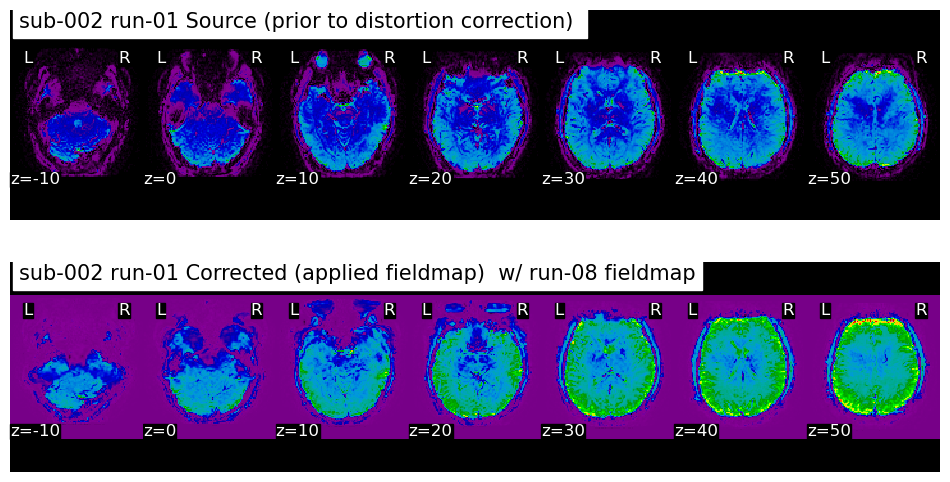

sub-002 run-02 run-08
Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


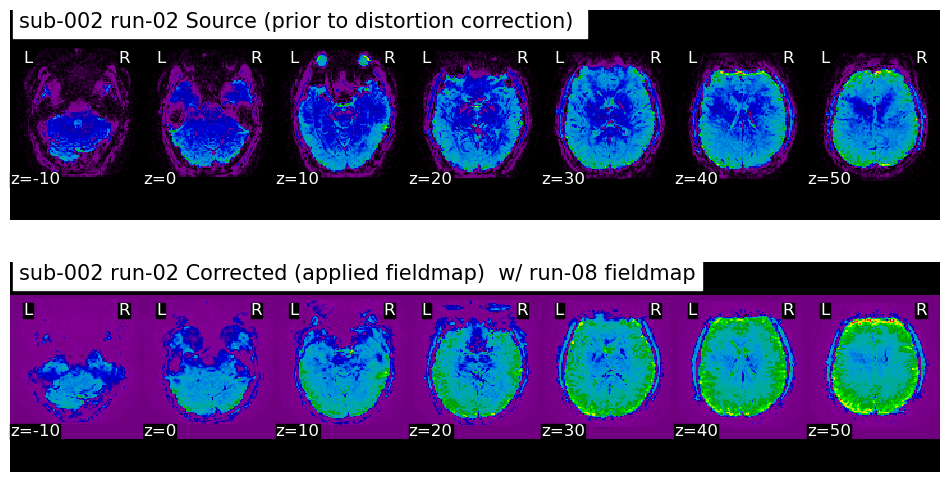

sub-002 run-08 run-07
Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          103.        ]
 [  -0.            1.98560095   -0.23955998 -102.30849457]
 [   0.            0.23956011    1.98559988  -58.15381622]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


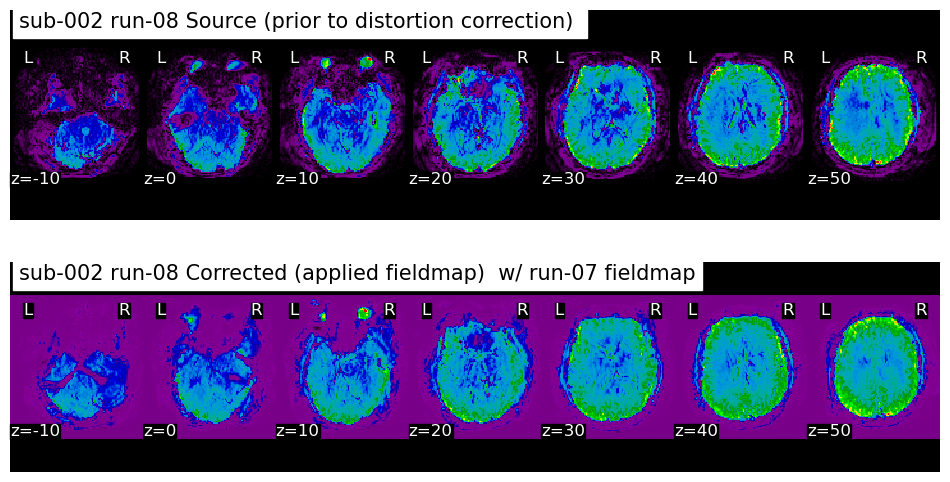

sub-003 run-01 run-06
Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


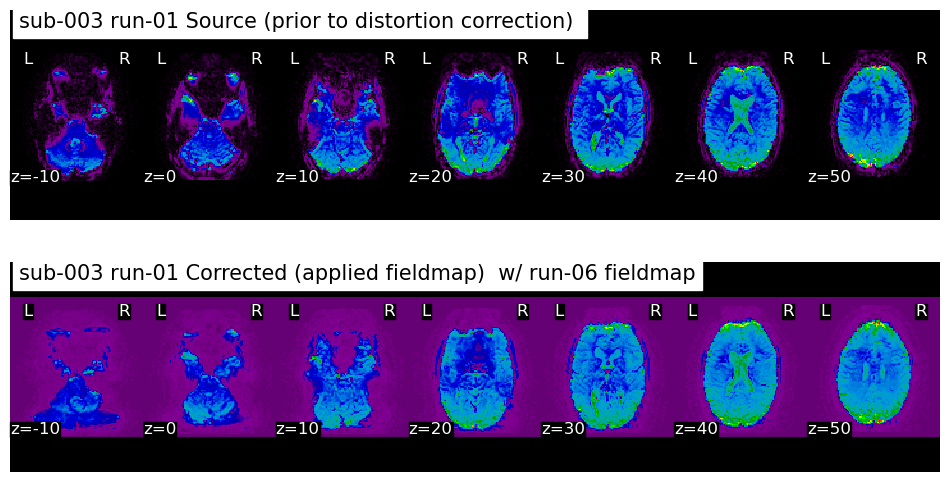

sub-003 run-06 run-07
Source image shape: (104, 104, 72)
Affine (source):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]
Corrected image shape: (104, 104, 72)
Affine (corrected):
 [[  -2.            0.           -0.          106.3203125 ]
 [   0.            1.99235713    0.17467961 -116.42481232]
 [   0.           -0.17467974    1.99235559  -27.16248512]
 [   0.            0.            0.            1.        ]]


/opt/anaconda3/envs/lbcn/lib/python3.12/site-packages/nilearn/image/resampling.py:869: UserWarning: Casting data from int32 to float32
  return resample_img(


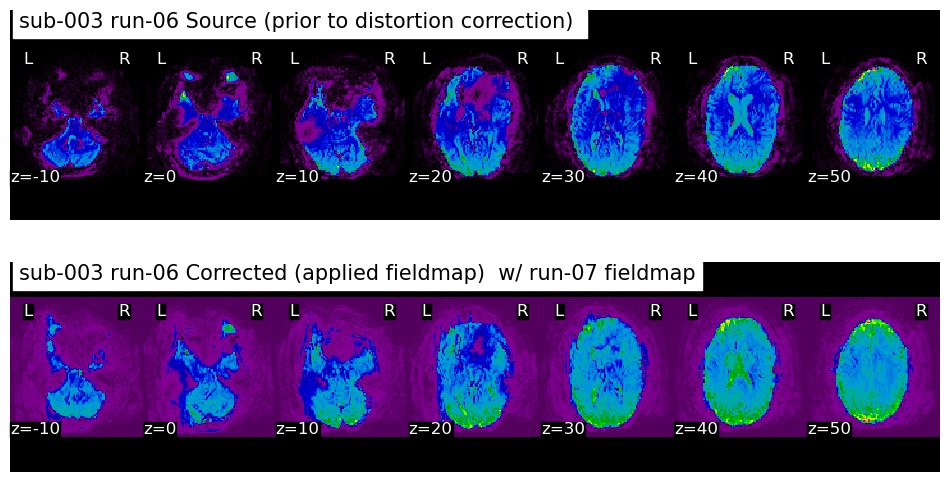

In [3]:
import matplotlib.pyplot as plt
from nilearn import plotting, image
import glob
remedy_list = [
    ('sub-002', 'run-01', 'run-08'),
    ('sub-002', 'run-02', 'run-08'),
    ('sub-002', 'run-08', 'run-07'),
    ('sub-003', 'run-01', 'run-06'),
    ('sub-003', 'run-06', 'run-07')]

source_dir = '/Users/heejungj/Documents/projects_local/visualsnow_source'
for i, (sub, epi_run, fieldmap_run) in enumerate(remedy_list):
    print(sub, epi_run, fieldmap_run)
    # Path to the EPI image files
    source_fname = glob.glob(f"{source_dir}/{sub}/func/{sub}_task-*_{epi_run}_bold.nii.gz")[0]
    epi_image_path = glob.glob(f"{source_dir}/TST/{sub}/{sub}_task-*_{epi_run}_boldcorrected.nii.gz")[0]

    # Load the EPI images
    source_img = image.load_img(source_fname)
    epi_img = image.load_img(epi_image_path)

    # Extract the third volume (index 2)
    third_source = image.index_img(source_img, 2)
    third_volume = image.index_img(epi_img, 2)

    # Print image shapes for debugging
    print("Source image shape:", third_source.shape)
    print("Affine (source):\n", third_source.affine)
    print("Corrected image shape:", third_volume.shape)
    print("Affine (corrected):\n", third_volume.affine)

    # Create a subplot with 1 row and 2 columns (side by side)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

    # Plot the pre-correction image (source) on the first axis
    plotting.plot_epi(
        third_source,
        display_mode="z",
        title=f"{sub} {epi_run} Source (prior to distortion correction) ",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax1,
        draw_cross=True
    )

    # Plot the post-correction image (corrected) on the second axis
    plotting.plot_epi(
        third_volume,
        display_mode="z",
        title=f"{sub} {epi_run} Corrected (applied fieldmap)  w/ {fieldmap_run} fieldmap",
        cut_coords=[-10, 0, 10, 20, 30, 40, 50],  # Specify the slice coordinates
        axes=ax2,
        draw_cross=True
    )
    
    # Show the plot
    plt.show()
